<a href="https://colab.research.google.com/github/Somesh140/ANN/blob/main/ANN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [2]:
## import some basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
## Divide the dataset into independent and dependent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [7]:
## Feature Engineering 
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [8]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [9]:
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [11]:
X=pd.concat([X,geography,gender],axis=1) 

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [13]:
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
X_train.shape

(8000, 11)

In [18]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [19]:
### Lets initialize the ANN
classifier=Sequential()

In [20]:
## Adding the input Layer and first hidden layer
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [21]:
classifier

In [22]:
## Adding the input Layer and first hidden layer
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [23]:
##adding the 3rd hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.3))

In [24]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [25]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [26]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [27]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5
   
)

In [29]:
X_train.shape

(8000, 11)

In [30]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.4215 - accuracy: 0.8175 - val_loss: 0.3844 - val_accuracy: 0.8402
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3650 - accuracy: 0.8425 - val_loss: 0.3814 - val_accuracy: 0.8334
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3575 - accuracy: 0.8533 - val_loss: 0.3656 - val_accuracy: 0.8557
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3520 - accuracy: 0.8524 - val_loss: 0.3694 - val_accuracy: 0.8527
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3458 - accuracy: 0.8567 - val_loss: 0.3656 - val_accuracy: 0.8448
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3414 - accuracy: 0.8571 - val_loss: 0.3843 - val_accuracy: 0.8402
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3403 - accuracy: 0.8582 - val_loss: 0.3528 - val_accuracy: 0.8508

In [31]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

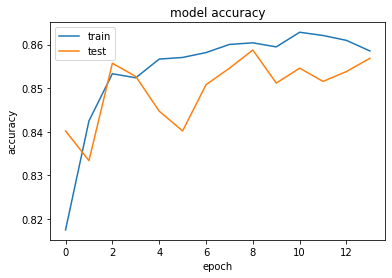

In [32]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

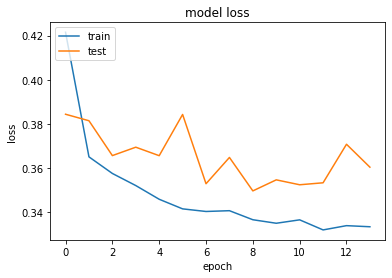

In [33]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3420 - accuracy: 0.8577 - val_loss: 0.3418 - val_accuracy: 0.8585
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3401 - accuracy: 0.8601 - val_loss: 0.3511 - val_accuracy: 0.8615
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3411 - accuracy: 0.8581 - val_loss: 0.3405 - val_accuracy: 0.8595
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3372 - accuracy: 0.8618 - val_loss: 0.3804 - val_accuracy: 0.8375
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3375 - accuracy: 0.8619 - val_loss: 0.3371 - val_accuracy: 0.8655
Epoch 6/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3370 - accuracy: 0.8601 - val_loss: 0.3466 - val_accuracy: 0.8570
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3363 - accuracy: 0.8594 - val_loss: 0.3526 - val_accuracy: 0.8525

In [35]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [36]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1554,   41],
       [ 239,  166]])

In [37]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [38]:
score

0.86

In [39]:
##get the weights
classifier.get_weights()

[array([[-3.02352101e-01, -5.03640115e-01, -1.09575592e-01,
          1.41776174e-01,  6.26963973e-01,  6.56085312e-01,
          2.52693780e-02, -5.97273171e-01, -5.23656011e-02,
         -2.89539229e-02],
        [-1.84587014e+00, -6.15588903e-01,  1.43075299e+00,
         -1.45554113e+00, -1.51786578e+00,  1.18917987e-01,
          2.32536912e+00,  2.50857162e+00, -7.72254527e-01,
          1.09676659e+00],
        [-1.05429840e+00, -7.98503384e-02, -4.80520837e-02,
          3.00535977e-01,  8.87444794e-01,  1.37923086e+00,
          4.51831788e-01, -5.52179694e-01, -3.98623288e-01,
          6.83599934e-02],
        [ 4.51000661e-01,  2.18281150e+00, -1.17223811e+00,
         -4.62190986e-01, -1.74025297e+00, -5.49870253e-01,
         -1.32052696e+00,  2.12423110e+00,  2.12722611e+00,
          9.57432747e-01],
        [ 3.24966647e-02, -8.55776489e-01, -3.10053945e+00,
          2.68356353e-01,  4.68475968e-01, -3.76479775e-01,
         -7.98914135e-01,  2.33788751e-02,  1.016474

In [40]:
## Saving h5 file
classifier.save('model.h5')

In [41]:
from tensorflow import keras

In [42]:
#loading h5 file
classifier1= keras.models.load_model('model.h5')

In [43]:
classifier1.predict(X_test)

array([[0.21776298],
       [0.22912523],
       [0.08699429],
       ...,
       [0.17391607],
       [0.20914969],
       [0.23838827]], dtype=float32)

In [44]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [48]:
#Regression
#Divide Dataset into independent and dependent features
X=dataset[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember','Exited']]
y = dataset.iloc[: ,12]

In [49]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0


In [50]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [51]:
## Ferature Engineering 
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)
X=pd.concat([X,geography,gender],axis=1) 
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Lets initialize the ANN
regressor=Sequential()
## Adding the input Layer and first hidden layer
regressor.add(Dense(10,input_shape=(11,),activation='relu'))


# adding the first hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.2))

##adding the second hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.3))

##  Adding the output layer
regressor.add(Dense(1))


In [52]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                120       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [53]:
import tensorflow
mse=tensorflow.keras.losses.MeanSquaredError(
    name='mean_squared_error'
)
metrics=tensorflow.keras.metrics.MeanSquaredError(
    name='mean_squared_error', dtype=None
)

In [54]:
regressor.compile(optimizer=opt,loss=mse,metrics=[metrics])

In [57]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_mean_squared_error",
    patience=20
   
)

In [58]:
model_history=regressor.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 1s 2ms/step - loss: 3292923904.0000 - mean_squared_error: 3292923904.0000 - val_loss: 3321315584.0000 - val_mean_squared_error: 3321315584.0000
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 3296065536.0000 - mean_squared_error: 3296065536.0000 - val_loss: 3362014976.0000 - val_mean_squared_error: 3362014976.0000
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 3296356352.0000 - mean_squared_error: 3296356352.0000 - val_loss: 3334182656.0000 - val_mean_squared_error: 3334182656.0000
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 3296085504.0000 - mean_squared_error: 3296085504.0000 - val_loss: 3328313344.0000 - val_mean_squared_error: 3328313344.0000
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 3291180288.0000 - mean_squared_error: 3291180288.0000 - val_loss: 3347624704.0000 - val_mean_squared_error: 3347624704.0000
Epoch

In [59]:
y_pred= regressor.predict(X_test)

In [60]:
from sklearn.metrics import r2_score

In [61]:
print(r2_score(y_test,y_pred))

-0.032579676804529
